# pyvis Examples

This notebook provides basic example for network graphing using

- pyvis : python visualization and interactive graphing
- nx : `networkx`

## Guideline

#### 1. Initialize class
#### 2. Build graph within nx
#### 3. add nx graph into pyvis (G.from_nx)

In [45]:
from pyvis.network import Network
from pyvis import network as net
import networkx as nx
import matplotlib.pyplot as plt

# Needed to show graph.html on jupyter frame
from IPython.display import display

class graphVis(object):
    def __init__(self, **kwargs):
        # Initialize pyvis Graph network

        w = kwargs.get('width',"100%")
        h = kwargs.get('height', "500px")
        
        #net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
        self.pvG = net.Network(height=h, width=w, notebook=True, cdn_resources='in_line')
        self._initNX(**kwargs)

    def _initNX(self, **kwargs):
        graphNum = kwargs.get('graphNum', 10)
        #g = nx.cycle_graph(10)
        #g = nx.complete_graph(5)
        
        g = kwargs.get('nxGraph', 'Graph')
        if g == 'cycle_graph' : self.G = nx.cycle_graph(graphNum)
        elif g == 'complete_graph' : self.G = nx.complete_graph(graphNum)
        else:
            # Empty Graph
            print("Use empty nx.Graph")
            self.G = nx.Graph()

    def draw(self, **kwargs):
        '''
        Default is to use pyvis to draw
        - import network from nx (self.g)
        '''
        # import NX network
        if len(self.G.nodes) > 0 : 
            print("draw: Import NX network")
            self.pvG.from_nx(self.G)
        
        # Get HTML filename
        gFN = self.FN(**kwargs)
        
        # Generate html with jscript interaction
        display(self.pvG.show(gFN))
        
        #display(IFrame(src=gFN, width=w, height=h))
        

    def FN(self, **kwargs):
        return kwargs.get('FN', "data/graphShow.html")

    def nx(self):
        return self.G

    def nxDraw(self, **kwargs):
        w = kwargs.get('width',10)
        h = kwargs.get('height',8)
        plt.figure(3,figsize=(w,h)) 
        nx.draw(self.G, with_labels=True)
        plt.show()
        
        

#gv.G.show("graphShow.html")

## Example 1 - Draw with pyvis

In [62]:
gv = graphVis(height='400px', width='100%')
gv.pvG.add_nodes([1,2,3], value=[10, 100, 400],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 54.2, 11.2],
                         y=[100.2, 23.54, 32.1],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])
gv.draw()

Use empty nx.Graph
data/graphShow.html


In [64]:
[d['id'] for d in gv.pvG.nodes]


[1, 2, 3]

## Example 2 - Basic nx draw

Use empty nx.Graph


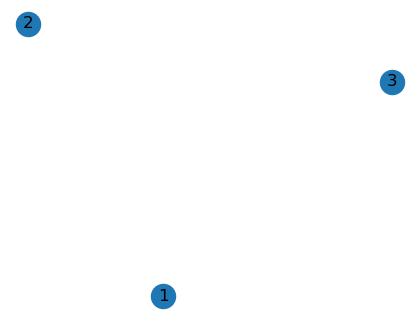

In [47]:
gv = graphVis()
gv.G.add_nodes_from([1,2,3], value=[10, 100, 400],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 54.2, 11.2],
                         y=[100.2, 23.54, 32.1],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])
gv.nxDraw(width=4, height=3)

In [ ]:
gv = graphVis()
gv.G.add_nodes_from([1,2,3], value=[10, 100, 400],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 54.2, 11.2],
                         y=[100.2, 23.54, 32.1],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])
gv.nxDraw(width=4, height=3)